## Construção do diagrama P-V do CH$_4$ usando o plugin CoolProp

In [146]:
# Carregando os pacotes do Python
import numpy as np
import matplotlib.pyplot as plt

# Importando as bibliotecas do CoolProp
import CoolProp as CP
from CoolProp.CoolProp import PropsSI

In [147]:
# Selecionando o fluido e verificando as propriedades do ponto crítico
# Obs.: o CH4 é chamado "Methane" no programa

Fluido = "Methane"

print(Fluido)

# Opções para construção do diagrama P-v
npontos = 1000
P_critico = PropsSI('PCRIT', Fluido) # Pa

print(P_critico)

Pmin = 1E6 # Pa
Pmax = P_critico - 100 # Pa
P_vec = np.linspace(Pmin,Pmax,num=npontos)
P_vec = np.append(P_vec, P_critico)

Methane
4599200.0


# A) Diagrama de fases

In [142]:
# Retornando os valores da massa específica - estados líquido e gasoso 
# nesta faixa de pressao
d_sat_liq = PropsSI('D', 'P', P_vec, 'Q', 0, Fluido)
d_sat_vap = PropsSI('D', 'P', P_vec, 'Q', 1, Fluido)

v_sat_liq = 1/d_sat_liq
v_sat_vap = 1/d_sat_vap

vmin = np.min(v_sat_liq)
vmax = np.max(v_sat_vap)

In [143]:
# Obtendo dados das isotermas
Psat = 25 #bar
Pisot = Psat * 1E5 # O valor do seu enunciado

Disot = PropsSI('D', 'P', Pisot, 'Q', 0, Fluido)
Tisot =  PropsSI('T', 'P', Pisot, 'D', Disot, Fluido)

Pisot1 =  PropsSI('P', 'T', Tisot, 'D', d_sat_liq, Fluido)
Pisot2 =  PropsSI('P', 'T', Tisot, 'D', d_sat_vap, Fluido)

print('Temperatura da isoterma: ' + str(Tisot) + 'K')

Temperatura da isoterma: 171.99170666277183K


# B) Calculando agora o trabalho de expansão de 0,02 a 0,03 $m^3$ (1kg de vapor saturado)

In [144]:
# Unidades: v em kg/m^3, pressáo em bar


lim_inf = 0.02
lim_sup = 0.03

index_inf = np.where(v_sat_vap < lim_inf)[0][0]
index_sup = np.where(v_sat_vap < lim_sup)[0][0]

area_tot = 0

# Implementação do método dos trapézios
for i in range(index_inf, index_sup, -1):
    dx = v_sat_vap[i-1] - v_sat_vap[i]
    dy = P_vec[i-1] - P_vec[i]

    #          Area do retângulo               Area do triângulo   
    area = (dx) * min(P_vec[i-1], P_vec[i])  +   abs(dx*dy)/2
    area_tot += area

massa = 1 #kg
W = -area_tot*massa   #  Pa * m^3 = N/m^2 * m^3 = N * m = J
print(f"O trabalho de expansão de 1kg de vapor de metano é: {W}J")

O trabalho de expansão de 1kg de vapor de metano é: -24024.637760703994J


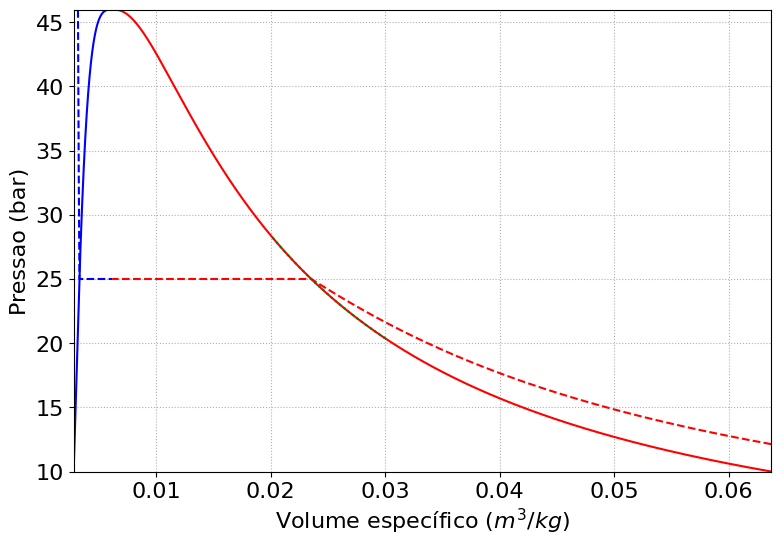

In [145]:
# Plotando agora o diagrama P-V(com isotermas)
plt.figure(figsize=(9,6))
plt.plot(v_sat_liq, P_vec/1E5, color='b')
plt.plot(v_sat_vap, P_vec/1E5, color='r')
plt.plot(v_sat_liq, Pisot1/1E5, color='b', linestyle='--')
plt.plot(v_sat_vap, Pisot2/1E5, color='r', linestyle='--')
plt.plot(v_sat_vap[index_sup:index_inf], P_vec[index_sup:index_inf]/1E5, color = 'g', linestyle = ':')
plt.grid(linestyle = ':')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Volume específico ($m^3/kg$)", fontsize = 16)
plt.ylabel("Pressao (bar)", fontsize = 16)
plt.axis([vmin, vmax, Pmin/1e5, P_critico/1e5])
plt.show()